# Screaming Frog Tech Audit Prioritization
Create a prioritized list of issues from Screaming Frog's tech audit.

Notebook uses a custom prioritization algorithm to label issues based on factors like traffic, issue type, priority, and issue scale.

## Import Issues Overview and GSC Data


In [11]:
import os
import pandas as pd
import plotly_express as px

issues_report = pd.read_csv('data/issues_overview_report.csv')
issues_report.head()

,Issue Name,Issue Type,Issue Priority,URLs,% of Total,Description,How To Fix,Help URL
0,Directives: Nofollow,Warning,High,22,3.18,URLs containing a 'nofollow' directive in eith...,URLs with a 'nofollow' should be reviewed care...,NaN
1,Structured Data: Rich Result Validation Errors,Issue,High,84,16.54,URLs that contain Google rich result feature v...,Resolve validation errors to ensure pages are ...,NaN
2,Search Console: No Search Analytics Data,Warning,Low,311,39.17,URLs that are not returning impressions in the...,Review URLs with no search analytics data and ...,NaN
3,Security: Protocol-Relative Resource Links,Warning,Low,487,41.17,"URLs that load resources such as images, JavaS...",Update any resource links to be absolute links...,NaN
4,Security: Missing HSTS Header,Warning,Low,204,17.24,URLs that are missing the HSTS response header...,The HSTS header should be used across all page...,NaN


In [12]:
gsc_df = pd.read_csv('data/search_console_all.csv')
gsc_df.head()

,Address,Status Code,Title 1,Indexability,Indexability Status,Clicks,Impressions,CTR,Position
0,https://www.zoominfo.com/,200,ZoomInfo: B2B Database | Company Contacts & In...,Indexable,NaN,262268.0,1011378.0,0.259,7.42
1,https://www.zoominfo.com/_next/static/media/zo...,0,NaN,Non-Indexable,Blocked by robots.txt,NaN,NaN,NaN,NaN
2,https://www.zoominfo.com/free-trial?camp_id=70...,200,Start Your Free Trial | ZoomInfo,Non-Indexable,Canonicalised,NaN,NaN,NaN,NaN
3,https://www.zoominfo.com/free-trial-contact-sales,200,Start Your Free Trial | ZoomInfo,Non-Indexable,noindex,NaN,NaN,NaN,NaN
4,https://www.zoominfo.com/newsroom,200,Welcome to the ZoomInfo Newsroom | ZoomInfo,Indexable,NaN,9.0,309.0,0.029,5.99


## Import All Issues Data

In [13]:
issues = []

issues_path = 'data/issues_reports'
export_path = '/'.join(issues_path.split('/')[0:-1]) + '/'

for issue in os.listdir(issues_path):
    issue_df = pd.read_csv(os.path.join(issues_path, issue))
    issue_name = issue.split('.')[0]
    issue_df['issue'] = issue_name
    issues.append(issue_df)


issues_df = pd.concat(issues)
issues_df = issues_df.dropna(subset='Address')
issues_df['issue'].value_counts()

issue
search_console_no_search_analytics_data                   311
structured_data_missing                                   275
response_codes_internal_blocked_by_robots_txt             257
response_codes_internal_blocked_resource                  254
response_codes_internal_redirection_(3xx)                 223
h2_duplicate                                              207
h2_multiple                                               204
content_low_content_pages                                 167
url_parameters                                            136
url_underscores                                           124
url_ga_tracking_parameters                                117
canonicals_canonicalised                                  115
h1_missing                                                 88
meta_description_duplicate                                 87
structured_data_rich_result_validation_errors              84
structured_data_rich_result_validation_warnings            83
li

## Data Cleaning

In [14]:
from src.data import clean_data
issues_group, issues_df = clean_data(issues_df, gsc_df, issues_report)
issues_group

,Issue Name,Clicks_gsc,Impressions_gsc,CTR_gsc,Position_gsc,Issue Type,Issue Priority,% of Total,issue,Address,pct_rank_clicks,pct_rank_urls
0,H2: Multiple,296729.0,3451188.0,0.100333,16.790580,Warning,Low,40.16,h2_multiple,204,1.000000,0.927273
1,Structured Data: Missing,294432.0,2674064.0,0.114176,14.156351,Opportunity,Low,54.13,structured_data_missing,275,0.981818,0.981818
2,H2: Non-Sequential,266718.0,1065560.0,0.145529,16.250588,Warning,Low,6.89,h2_nonsequential,35,0.963636,0.518182
3,Page Titles: Duplicate,262377.0,1013287.0,0.119600,16.334000,Opportunity,Medium,7.87,page_titles_duplicate,40,0.945455,0.572727
4,Page Titles: Below 30 Characters,31447.0,2201118.0,0.075148,9.181481,Opportunity,Medium,7.87,page_titles_below_30_characters,40,0.927273,0.572727
5,Page Titles: Below 200 Pixels,28226.0,2122594.0,0.085250,6.721875,Opportunity,Medium,3.54,page_titles_below_200_pixels,18,0.909091,0.363636
6,Content: Low Content Pages,15417.0,785966.0,0.108250,17.142917,Opportunity,Medium,31.10,content_low_content_pages,167,0.890909,0.909091
7,H2: Missing,12315.0,739040.0,0.109400,11.488000,Warning,Low,9.25,h2_missing,47,0.872727,0.627273
8,Content: Readability Very Difficult,10693.0,660372.0,0.034333,4.300000,Opportunity,Low,1.30,content_readability_very_difficult,7,0.854545,0.218182
9,H1: Missing,10079.0,705907.0,0.063833,34.293333,Issue,Medium,17.32,h1_missing,88,0.836364,0.818182


## Label Data

In [15]:
from src.data import label_data
issues_group = label_data(issues_group)
issues_group # sorted by impact score

,Issue Name,Clicks_gsc,Impressions_gsc,CTR_gsc,Position_gsc,Issue Type,Issue Priority,% of Total,issue,Address,pct_rank_clicks,pct_rank_urls,Priority_Score,Type_Score,Impact_Score,pct_rank_impact,Impact_Score_Quadrant
9,H1: Missing,10079.0,705907.0,0.063833,34.293333,Issue,Medium,17.32,h1_missing,88,0.836364,0.818182,3,5,74.054785,1.000000,High
1,Structured Data: Missing,294432.0,2674064.0,0.114176,14.156351,Opportunity,Low,54.13,structured_data_missing,275,0.981818,0.981818,1,3,71.080672,0.981818,High
3,Page Titles: Duplicate,262377.0,1013287.0,0.119600,16.334000,Opportunity,Medium,7.87,page_titles_duplicate,40,0.945455,0.572727,3,3,70.244260,0.963636,High
6,Content: Low Content Pages,15417.0,785966.0,0.108250,17.142917,Opportunity,Medium,31.10,content_low_content_pages,167,0.890909,0.909091,3,3,70.207097,0.945455,High
27,Structured Data: Rich Result Validation Errors,58.0,1212.0,0.065500,49.042500,Issue,High,16.54,structured_data_rich_result_validation_errors,84,0.527273,0.781818,5,5,65.013762,0.927273,High
4,Page Titles: Below 30 Characters,31447.0,2201118.0,0.075148,9.181481,Opportunity,Medium,7.87,page_titles_below_30_characters,40,0.927273,0.572727,3,3,64.933087,0.909091,High
0,H2: Multiple,296729.0,3451188.0,0.100333,16.790580,Warning,Low,40.16,h2_multiple,204,1.000000,0.927273,1,1,62.181818,0.890909,High
5,Page Titles: Below 200 Pixels,28226.0,2122594.0,0.085250,6.721875,Opportunity,Medium,3.54,page_titles_below_200_pixels,18,0.909091,0.363636,3,3,59.663425,0.872727,High
12,H2: Duplicate,7458.0,743258.0,0.077421,19.758947,Opportunity,Low,40.75,h2_duplicate,207,0.781818,0.945455,1,3,56.709738,0.854545,High
11,Content: Readability Difficult,9158.0,861015.0,0.076667,21.248333,Opportunity,Low,14.71,content_readability_difficult,79,0.800000,0.727273,1,3,53.264678,0.836364,High


## Data Visualizations

In [16]:
# Distribution plot based on Impact Score
fig = px.histogram(issues_group,
                     x='Impact_Score',
                   color='Impact_Score_Quadrant',
                     title='Distribution of Impact Scores by Cluster')
fig.update_layout(
    xaxis_title='Impact Score',
    yaxis_title='Count of Issues',
    legend_title_text='Impact Score Level'
)
fig.show()

In [17]:
from src.visualization import plot_top_percentiles
perc_n = 0.75 # adjust as needed

plot_top_percentiles(issues_group, perc_n)

## Visualize Impact Items & Export Data

In [18]:
from src.utils import export_data
export_path = 'export/'
export_data(issues_group, issues_df, export_path, issues_path)

Data exported to export/issues_with_traffic_pages.xlsx


## Optional: Cluster Issues & Summarize


Percentage decrease in distortion:
From 1 to 2 clusters: 9.4% decrease
From 2 to 3 clusters: 8.0% decrease
From 3 to 4 clusters: 6.8% decrease
From 4 to 5 clusters: 1.3% decrease
From 5 to 6 clusters: 7.6% decrease
From 6 to 7 clusters: 8.7% decrease
From 7 to 8 clusters: 9.0% decrease
From 8 to 9 clusters: 5.8% decrease
From 9 to 10 clusters: 6.4% decrease
From 10 to 11 clusters: 7.0% decrease
From 11 to 12 clusters: 5.9% decrease
From 12 to 13 clusters: 5.5% decrease
From 13 to 14 clusters: 9.9% decrease
From 14 to 15 clusters: 4.0% decrease


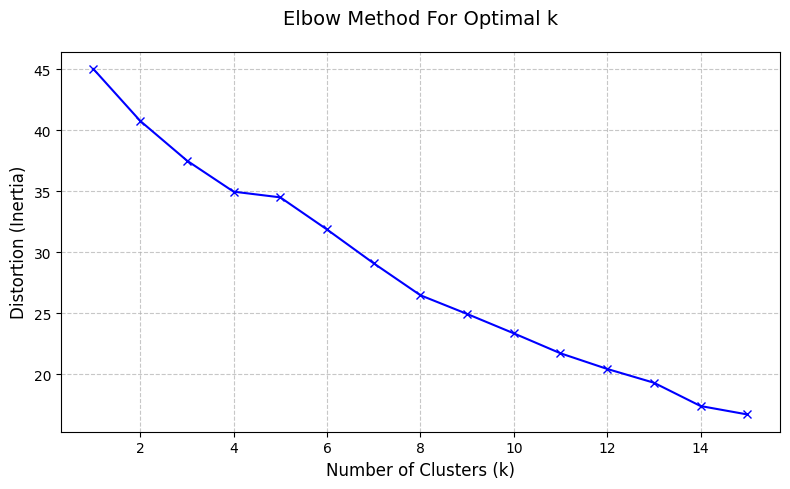

In [19]:
from src.utils import generate_embeddings
from src.visualization import plot_elbow, clusters_2D

issues_list = issues_group['Issue Name'].tolist()
issues_embeddings = generate_embeddings(issues_list)

plot_elbow(issues_embeddings, max_clusters=15) # set max_clusters as needed

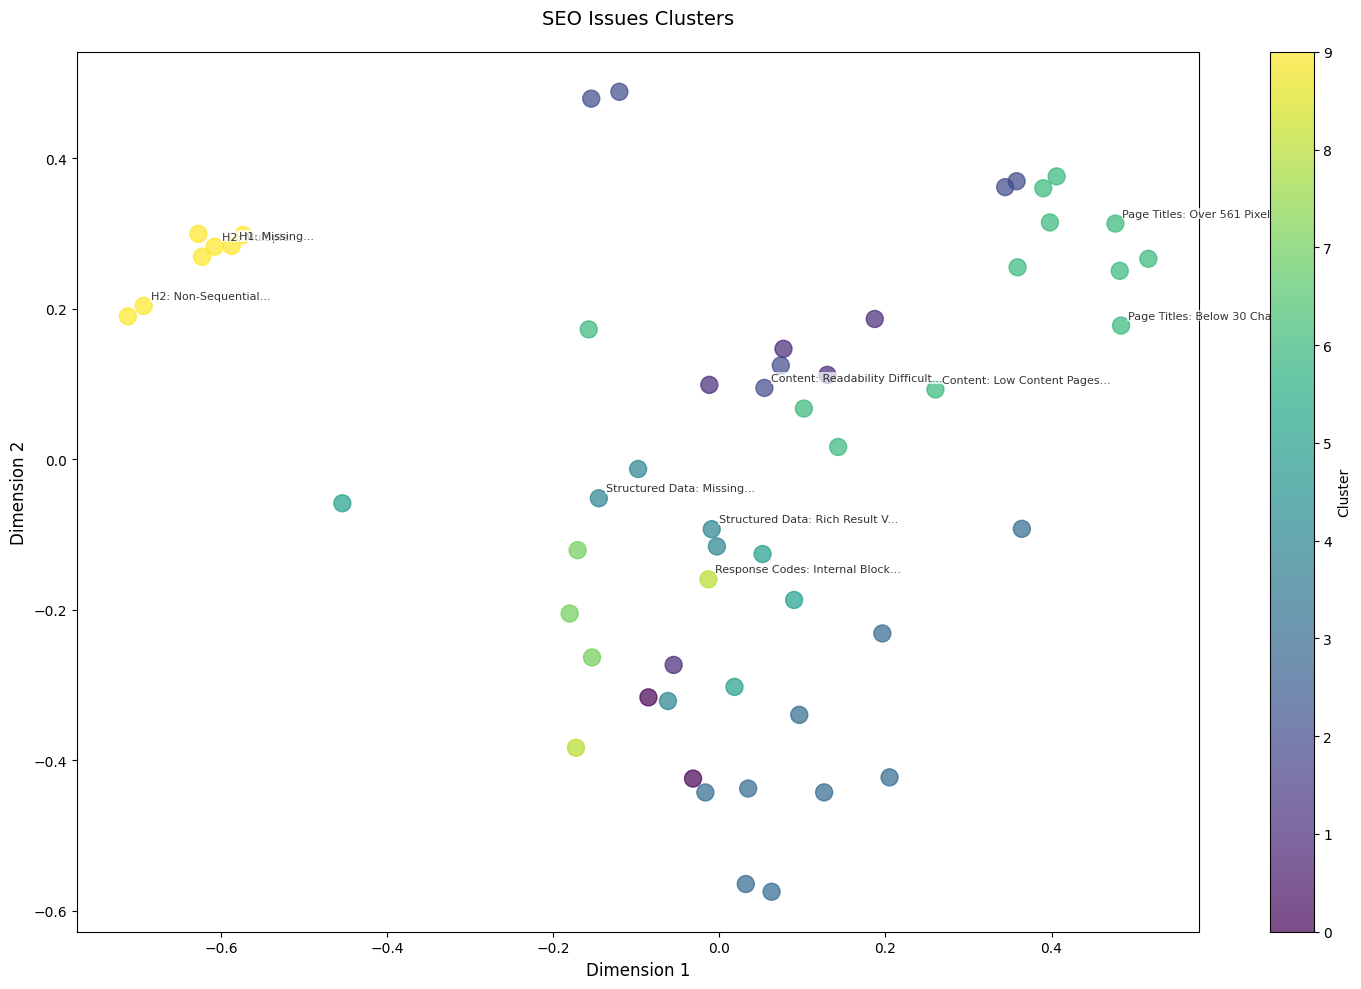


Cluster Statistics:

Cluster 1:
Number of issues: 2
Average Impact Score: 31.3
Top issues in this cluster:
- Directives: Noindex
  Impact: 31.3
  Type: Warning
  Priority: High
- Directives: Nofollow
  Impact: 31.2
  Type: Warning
  Priority: High

Cluster 2:
Number of issues: 5
Average Impact Score: 31.8
Top issues in this cluster:
- Meta Description: Duplicate
  Impact: 47.5
  Type: Opportunity
  Priority: Low
- Meta Description: Missing
  Impact: 42.2
  Type: Opportunity
  Priority: Low
- Images: Missing Alt Text
  Impact: 28.1
  Type: Issue
  Priority: Low

Cluster 3:
Number of issues: 6
Average Impact Score: 41.6
Top issues in this cluster:
- Content: Readability Difficult
  Impact: 53.3
  Type: Opportunity
  Priority: Low
- Meta Description: Over 155 Characters
  Impact: 52.6
  Type: Opportunity
  Priority: Low
- Content: Readability Very Difficult
  Impact: 43.7
  Type: Opportunity
  Priority: Low

Cluster 4:
Number of issues: 9
Average Impact Score: 22.6
Top issues in this clu

In [20]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

n_clusters = 10 # based on distortion decrease
kmeans = KMeans(n_clusters=n_clusters,
                random_state=0,
                n_init = 'auto').fit(issues_embeddings)
kmeans_labels = kmeans.labels_
PCA_model = PCA(n_components=2)
PCA_model.fit(issues_embeddings)
new_values = PCA_model.transform(issues_embeddings)

clusters_2D(x_values = new_values[:,0], y_values = new_values[:,1],
            labels = issues_group, kmeans_labels = kmeans_labels)